In [1]:
#importing all the necessary libraries from python.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import numpy as np

In [2]:
## task-1 : get data from csv file.
def get_data(path):
    
    """
    load the data from parameters and return loladed data.

    parameters:
    path : csv file path to read and load the data.

    this function returns the loaded data.    
    """
    
    #load the data from the csv file.
    loaded_data = pd.read_csv(path)
    return loaded_data

In [3]:
## task-2 : from the loaded data visualize the distribution of the data.

def visualize_data(data):
    
    """
    this helps to creat a histogram to visualize the distribution of data.

    parameters:
    data : The data for which histogram should be created to visualize the distribution.
    """
    
    # Plot-1: Histogram based on the distribution of Ladder Score (Happiness Score).
    plt.figure(figsize=(10, 6))
    
    # Plot histogram.
    sns.histplot(data['Ladder score'], bins=15, color='darkgreen', edgecolor='white', kde=True)
    
    # Calculate mean and median.
    mean = data['Ladder score'].mean()
    median = data['Ladder score'].median()
    std = data['Ladder score'].std()
    
    # Add vertical lines for mean and median.
    plt.axvline(mean, color='red', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='blue', linestyle=':', linewidth=3, label=f'Median: {median:.2f}')

    # Add annotation of standard deviation on the histogram.
    plt.text(mean + std, 12.5, s=f"Std Dev: {std:.2f}", color='darkgreen', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='darkgreen'))
    
    # Add labels and title.
    plt.title('Distribution of Ladder Score (Happiness Index)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Ladder Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Add grid and legend.
    plt.grid(axis='y', linestyle=':', color='darkgreen', alpha=0.5)
    plt.legend(fontsize=10, shadow=True)
    
    # Optimize layout.
    plt.tight_layout()
    
    # Show the plot.
    plt.show()

In [4]:
## task-3 : from the loaded data analyze the relationship GDP and happines(ladder_score).

def data_relation(data):
    
    """
    creates a scatter plot of logged GDP per capita vs Ladder score and add a linear regression to explore the relationship between two.

    parameters:
    data : loaded data from the csv file.

    This function returns the regression model details.    
    """
    
    # plot-2 : Scatter Plot with Line Fitting: GDP vs Ladder Score.
    X = data[['Logged GDP per capita']].values
    y = data['Ladder score'].values
    
    # Perform linear regression.
    model = LinearRegression()
    model.fit(X, y)
    y = model.predict(X)
    
    # Plot the data.
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=data['Logged GDP per capita'], y=data['Ladder score'], color='blue', label='Data', edgecolor='black')
    
    # plot the regression line.
    plt.plot(data['Logged GDP per capita'], y, color='red', linewidth=2, label='Regression Line')
    
    # Title and labels.
    plt.title('Relationship between GDP per Capita and Ladder Score', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Logged GDP per Capita', fontsize=12)
    plt.ylabel('Ladder Score', fontsize=12)
    
    # Customize legend and grid.
    plt.legend(fontsize=10, shadow=True)
    plt.grid(linestyle=':', alpha=0.7)
    
    # Show the plot.
    plt.show()

    return {'coefficient': model.coef_[0], 'intercept': model.intercept_}

In [24]:
## task-4 : Heatmap creation to understand the correlations between happiness factors.

def corr_happiness(data):

    """
    This function genrates a heatmap to understand the correlations between happiness factors.

    parameters:
    data : loaded data from the csv file.
    """

    # plot-3 : Heatmap for Correlations among key variables
    # array for key variables.
    corr_columns = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    
    # Calculate the correlation matrix.
    corr_matrix = data[corr_columns].corr()
    
    # Plot the heatmap.
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Happiness Factors', fontsize=18, fontweight='bold', pad=20)
    
    # Show the plot.
    plt.show()

In [25]:
## task-5 : K-means clustering to identify group of cuntries acoording to the key factors.

def k_clustering(data):
    
    """
    first creates an elbow plot to identify optimal clusters and apply K-means clustering to the data.

    parameters:
    data : loaded data from the csv file.
    """

    # plot-4 : Elbow Plot for optimal clusters.
    features = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy']]
    
    # Find the optimal number of clusters.
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        inertia.append(kmeans.inertia_)
    
    # Plot the elbow plot.
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 11), inertia, color='green', marker='o')
    
    # Title and labels.
    plt.title('Elbow Plot for Optimal Clusters', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of Clusters', fontsize=16)
    plt.ylabel('Inertia', fontsize=16)
    
    # Customize grid.
    plt.grid(linestyle=':', color='darkgreen', alpha=0.5)
    
    # Show the plot.
    plt.show()

    # Kmeans clusttering with the optimal cluster numbers.
    K_optimal = 3 # interia drops significantly till k=3, after that it slows down.
    kmeans = KMeans(n_clusters=K_optimal, random_state=42)
    data['Cluster'] = kmeans.fit_predict(features)
    
    # Plot the clusters.
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=data['Logged GDP per capita'], y=data['Ladder score'], hue=data['Cluster'], palette='Set1',style=data['Cluster'])
    
    # Titles and labels.
    plt.title('K-means Clustering of Happiness Data', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Logged GDP per Capita', fontsize=14)
    plt.ylabel('Ladder Score', fontsize=14)
    
    # Customize grid.
    plt.grid(linestyle=':', alpha=0.7)
    
    # Show the plot.
    plt.show()

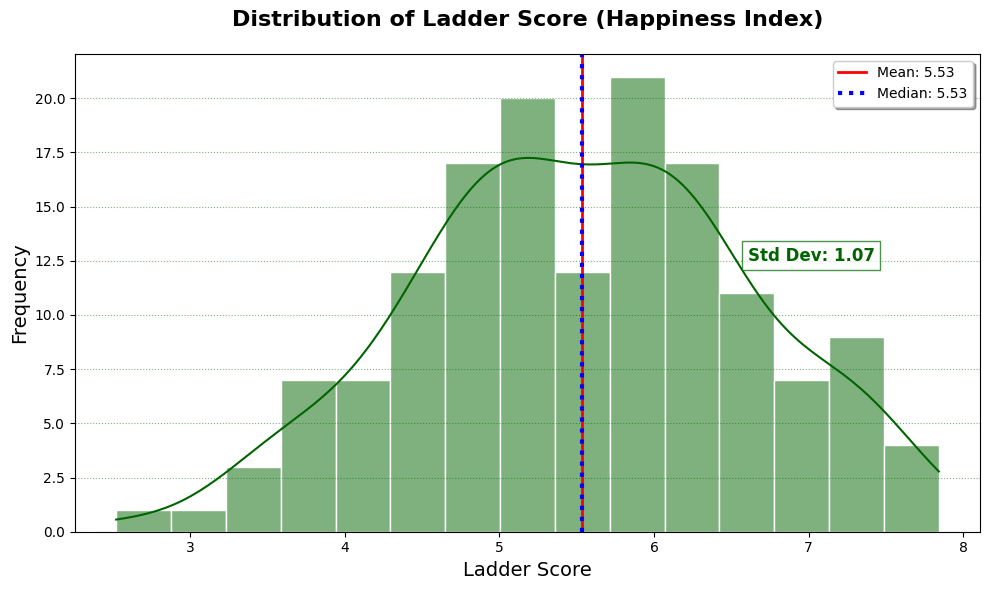

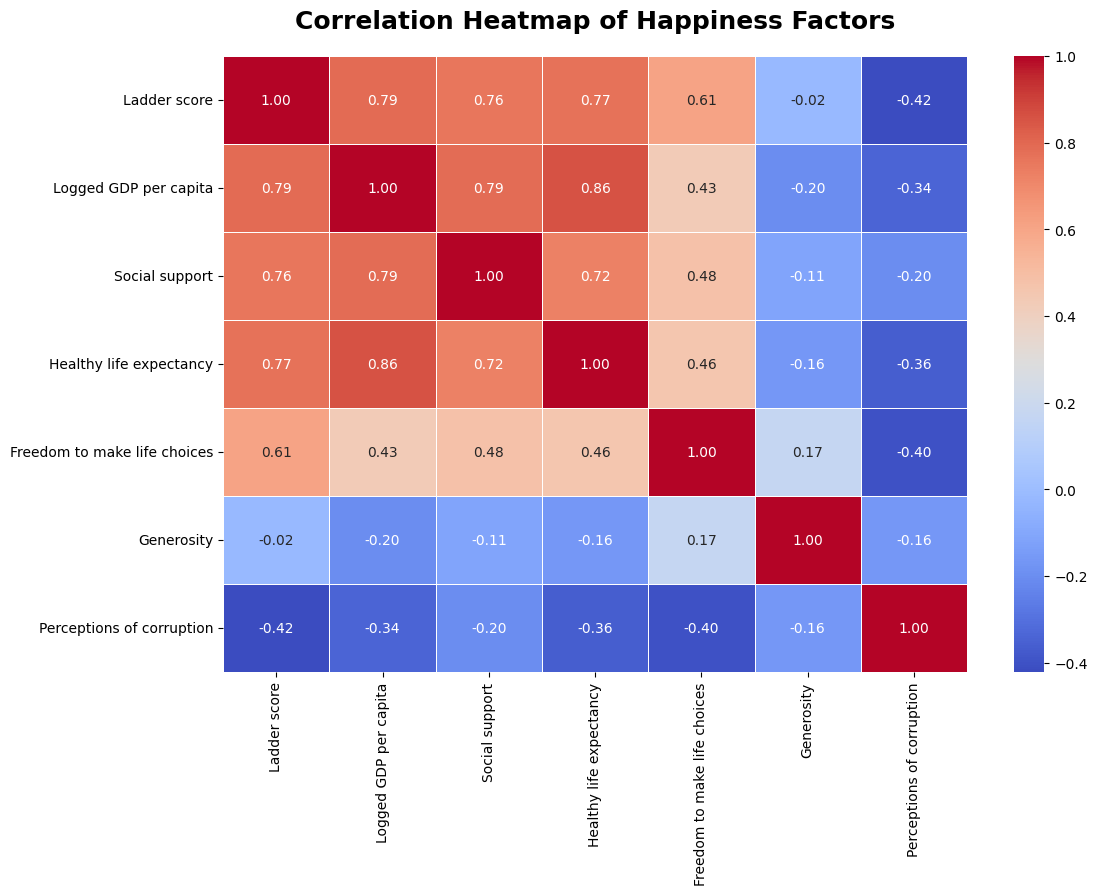

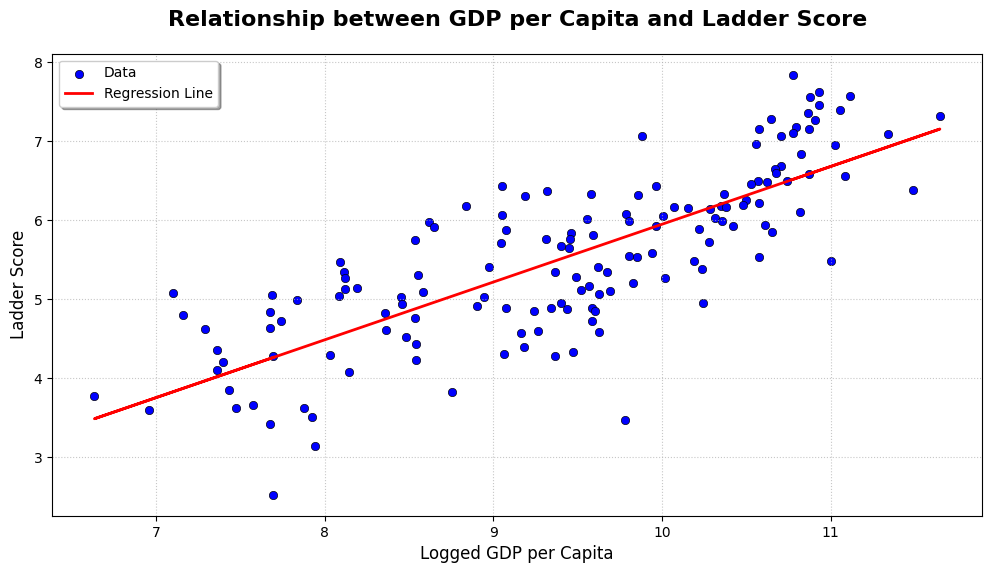

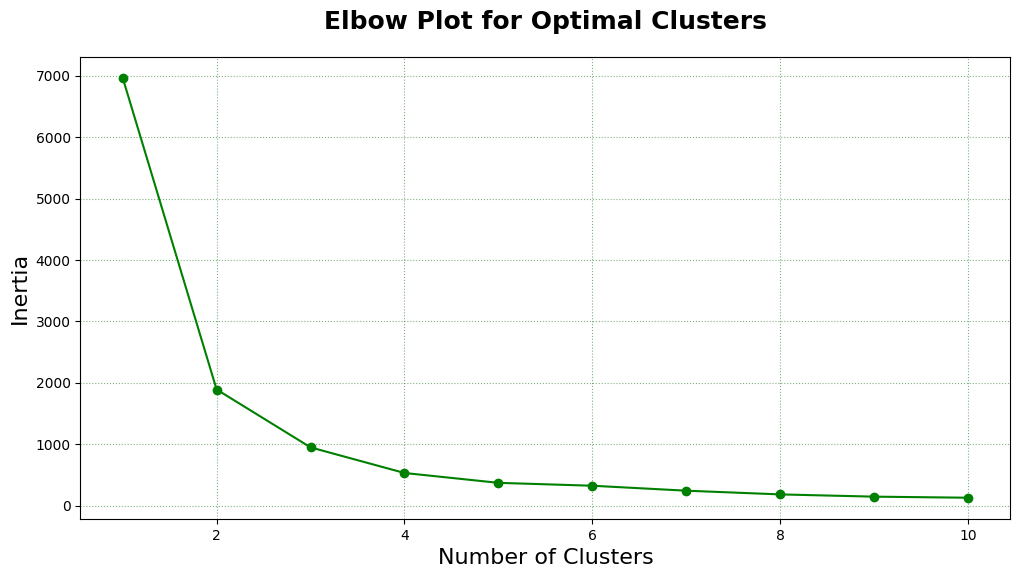

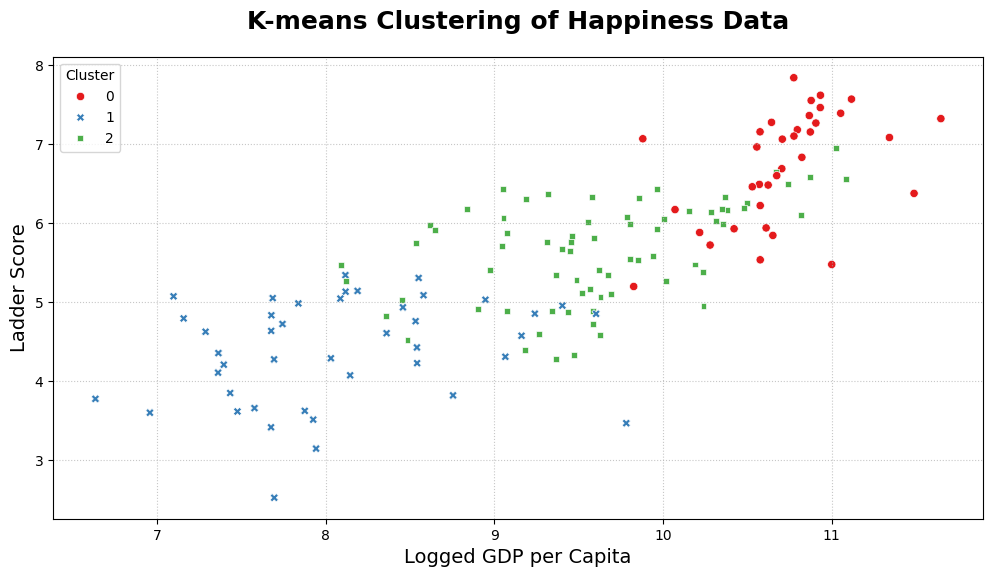


Results of Logged GDP per Capita-Ladder score regression are as below :
Coefficient: 0.732
Intercept: -1.372


In [26]:
## Main execution of all the performed tasks.
def main():

    """
    This function runs the entire workflow of analysis.
    """
    
    url = 'world-happiness-report-2021.csv'
    loaded_data=get_data(url)

    if loaded_data is not None:
        visualize_data(loaded_data)
        corr_happiness(loaded_data)
        gdp_result = data_relation(loaded_data)
        k_clustering(loaded_data)

        print("\nResults of Logged GDP per Capita-Ladder score regression are as below :")
        print(f"Coefficient: {gdp_result['coefficient']:.3f}")
        print(f"Intercept: {gdp_result['intercept']:.3f}")

main()
            